# Benchmarks

In [12]:
import random
import numpy as np
import pandas as pd
import time
import functools

import matplotlib.pyplot as plt

import timeit
from timeit import Timer
import copy
import numba 

#### Quadratic sorting algorithms

In [20]:
@numba.jit()
def numba_insertion_sort(A):
    for j in range(1, len(A)):
        key = A[j]

        while j > 0 and A[j-1] > key:
            # Swap
            A[j], A[j-1] = A[j-1], A[j]
            j -= 1

def insertion_sort(A):
    for j in range(1, len(A)):
        key = A[j]

        while j > 0 and A[j-1] > key:
            # Swap
            A[j], A[j-1] = A[j-1], A[j]
            j -= 1


@numba.jit()
def numba_bubble_sort(A):
    n = len(A)
    has_swapped = True
    num_rounds = 0

    while(has_swapped):
        has_swapped = False

        # Shortens end of list by n - kth iteration - 1
        for i in range(n - num_rounds - 1):

            if A[i] > A[i+1]:
                # Swap
                A[i], A[i+1] = A[i+1], A[i]
                has_swapped = True
        num_rounds += 1

def bubble_sort(A):
    n = len(A)
    has_swapped = True
    num_rounds = 0

    while(has_swapped):
        has_swapped = False

        # Shortens end of list by n - kth iteration - 1
        for i in range(n - num_rounds - 1):

            if A[i] > A[i+1]:
                # Swap
                A[i], A[i+1] = A[i+1], A[i]
                has_swapped = True
        num_rounds += 1

@numba.jit()    
def numba_merge_sort(values): 
  
    if len(values)>1: 
        m = len(values)//2
        left = values[:m] 
        right = values[m:] 
        left = merge_sort(left) 
        right = merge_sort(right) 
  
        values =[] 
  
        while len(left)>0 and len(right)>0: 
            if left[0]<right[0]: 
                values.append(left[0]) 
                left.pop(0) 
            else: 
                values.append(right[0]) 
                right.pop(0) 
  
        for i in left: 
            values.append(i) 
        for i in right: 
            values.append(i) 
                  
    return values   
        
def merge_sort(values): 
  
    if len(values)>1: 
        m = len(values)//2
        left = values[:m] 
        right = values[m:] 
        left = merge_sort(left) 
        right = merge_sort(right) 
  
        values =[] 
  
        while len(left)>0 and len(right)>0: 
            if left[0]<right[0]: 
                values.append(left[0]) 
                left.pop(0) 
            else: 
                values.append(right[0]) 
                right.pop(0) 
  
        for i in left: 
            values.append(i) 
        for i in right: 
            values.append(i) 
                  
    return values

#### Number generator

In [14]:
def random_int_generator(length):
    """Creates list of integers of given length - with random order"""
    return list((np.random.randint(-length, length, size=length)))

def random_float_generator(length):
    """Creates list of decimal numbers of given length - with random order"""
    return list((np.random.uniform(-length, length, size=length)))

def ordered_generator(length):
    """Creates list of numbers of given length - with acsending order"""
    return list(np.arange(1, length))

def reversed_generator(length):
    """Creates list of numbers of given length - with descending order"""
    return list(np.flipud(ordered_generator(length)))

def string_generator(length):
  """Creates list of numbers of given length - with descending order"""

In [22]:
#print(random_int_generator(10))
#print(random_float_generator(10))
#print(ordered_generator(10))
#print(reversed_generator(10))

#### Benchmark function

In [21]:
def benchmark(algorithm, given_list):
    """ Returns the runtime of a given sorting algorithim on a list of given length and type."""
    
    rng = np.random.default_rng(12235) 
    clock = timeit.Timer(stmt='sort_func(copy(data))', globals={'sort_func': algorithm,
                                                                'data': given_list , 'copy': copy.copy})
    n_ar, t_ar = clock.autorange()
    t = clock.repeat(repeat=10, number=n_ar)
    return np.average(t)/n_ar

In [17]:
def benchmark_algos_and_types(algorithm, list_size):
    """ Returns the time for given list type and return a dictionary with the results. """
    
    integer_results = [( _ , benchmark(algorithm, random_int_generator(_))) 
                      for _ in range(0, list_size, 50)]
    
    float_results = [( _ , benchmark(algorithm, random_float_generator(_))) 
                     for _ in range(0, list_size, 50)]
    
    ascending_results = [( _ , benchmark(algorithm, ordered_generator(_))) 
                         for _ in range(0, list_size, 50)]
    
    descending_result = [( _ , benchmark(algorithm, reversed_generator(_))) 
                         for _ in range(0, list_size, 50)]
    
    
    all_results = {'Random integers' : integer_results, 
                   'Random float' : float_results, 
                   'Ascending integers' : ascending_results,
                   'Descending integers' : descending_result}
    
    return all_results

#### Plotting

In [19]:
def plot_algorithms_benchmark(algorithm, list_size):
    """ Plots the runtime for the different list types. """
    
    results = benchmark_algos_and_types(algorithm, list_size)
    plt.figure()
    for typ in results:
        size, time = zip(*results[typ])
        plt.plot(size, time, label = typ)
        plt.title(algorithm.__name__)
        plt.xlabel('Number of items (n)')
        plt.ylabel('Runtime dependent on n')
        plt.legend()

In [ ]:
algorithms = [numba_insertion_sort, insertion_sort]

for algo in algorithms:
    plot_algorithms_benchmark(algo, 500)

KeyboardInterrupt: ignored

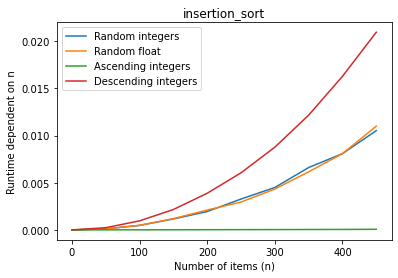

In [9]:
algorithms = [numba_insertion_sort, numba_bubble_sort, numba_merge_sort]

for algo in algorithms:
    plot_algorithms_benchmark(algo, 1000)